In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [271]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [272]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [273]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### **Data Cleaning**

In [274]:
df.drop_duplicates(inplace = True)

In [275]:
upd_ages = df[df['Age']<1].Age*100
for i, v in zip(upd_ages.index, upd_ages.values):
    a = upd_ages[i]
    print(a)
    df.loc[i, 'Age'] = a

83.0
92.0
75.0
75.0
67.0
42.0
83.0


In [276]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [277]:
df.Age.fillna(round(df['Age'].mean()), inplace = True)
df.Cabin.bfill(inplace = True)
df.Cabin.ffill(inplace = True)
df.Embarked.bfill(inplace = True)

In [278]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [279]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.333333,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.385112,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,92.000000,8.000000,6.000000,512.329200


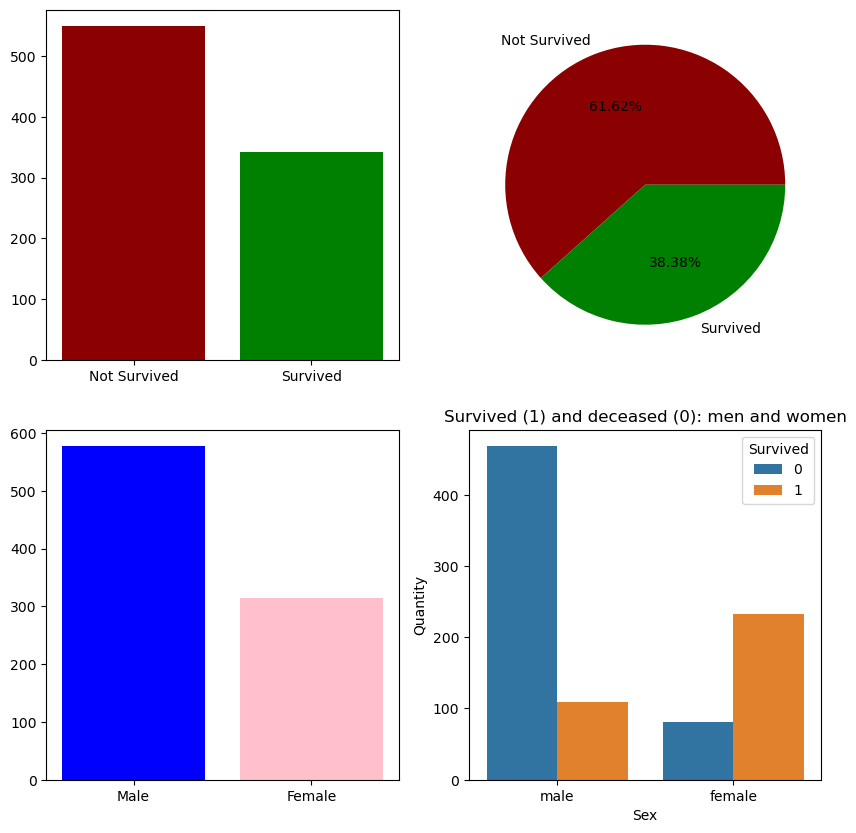

In [280]:
fig, ax = plt.subplots(2, 2, figsize = (10,10))
survival = df['Survived'].value_counts()
ax[0, 0].bar(['Not Survived', 'Survived'], survival.values, color = ['darkred', 'green'])

ax[0, 1].pie(df['Survived'].value_counts(), labels = ['Not Survived', 'Survived'], autopct = "%.2f%%", colors = ['darkred', 'green'])

gender = df['Sex'].value_counts()
ax[1, 0].bar(['Male', 'Female'], gender.values, color = ['blue', 'pink'])

sb.countplot(data = df, x = 'Sex', hue = 'Survived', ax = ax[1, 1]) 
ax[1, 1].set_ylabel('Quantity') 
ax[1, 1].set_title('Survived (1) and deceased (0): men and women') 

plt.show()

In [281]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Removing columns which doesnot impact on Passenger Survival

In [282]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,30.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [283]:
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
categorical_col = ['Sex']
df[categorical_col] = enc.fit_transform(df[categorical_col])

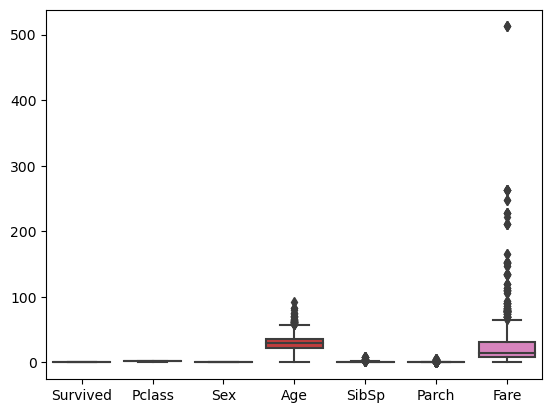

In [284]:
sb.boxplot(df)
plt.show()

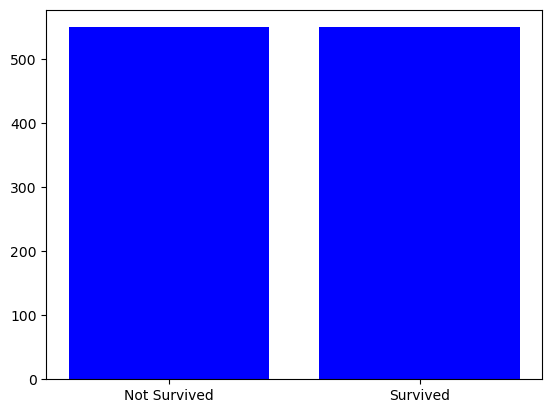

In [285]:
X = df.iloc[:,1:].values
y = df.iloc[:, 0].values

sm = SMOTE()
X_new, y_new = sm.fit_resample(X, y)

v, c = np.unique(y_new, return_counts=True)
plt.bar(['Not Survived', 'Survived'], c, color = ['blue'])
plt.show()

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, train_size = 0.8, test_size = 0.2, random_state = 10)

ss = StandardScaler()
Xt_train = ss.fit_transform(X_train)
Xt_test = ss.transform(X_test)

## **Training Different Models to find Best model**

### 1. KNeighborsClassifier

In [288]:
knn_model = KNeighborsClassifier()
gscv = GridSearchCV(knn_model, param_grid = {'n_neighbors':[6,8,10,15,20, 25, 30], 'metric':['manhattan', 'euclidean']}, cv = 5)
gscv.fit(Xt_train, y_train)
print(gscv.best_score_)
print(gscv.best_params_)

0.8029805194805195
{'metric': 'manhattan', 'n_neighbors': 15}


### 2. LogisticRegression

In [289]:
lr_model = LogisticRegression()
gscv = GridSearchCV(lr_model, 
                    param_grid={'penalty': ['l2'], 'multi_class': ['auto', 'ovr', 'multinomial'], 'max_iter': [100, 150, 200]},
                    cv = 5)
gscv.fit(Xt_train, y_train)
print(gscv.best_score_)
print(gscv.best_params_)

0.7802272727272727
{'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}


In [290]:
lr_model = LogisticRegression(max_iter= 100, multi_class= 'auto', penalty= 'l2')
lr_model.fit(Xt_train, y_train)
print(lr_model.score(Xt_train, y_train))
print(lr_model.score(Xt_test, y_test))

0.7813211845102506
0.8


In [291]:
lr_model = LogisticRegression()
lr_model.fit(Xt_train, y_train)
print(lr_model.score(Xt_train, y_train))
print(lr_model.score(Xt_test, y_test))

0.7813211845102506
0.8


### 3. DecisionTreeClassifier

In [292]:
dtc_model = DecisionTreeClassifier()
gscv = GridSearchCV(dtc_model, 
                    param_grid={'criterion': ['gini', 'entropy']},
                    cv = 5)
gscv.fit(Xt_train, y_train)
print(gscv.best_score_)
print(gscv.best_params_)

dtc_model = DecisionTreeClassifier()
dtc_model.fit(Xt_train, y_train)
print(dtc_model.score(Xt_train, y_train))
print(dtc_model.score(Xt_test, y_test))

0.787038961038961
{'criterion': 'entropy'}
0.9863325740318907
0.8363636363636363


### 4. RandomForestClassifier

In [293]:
rfc_model = RandomForestClassifier()
gscv = GridSearchCV(dtc_model, 
                    param_grid={'criterion': ['gini', 'entropy'], 'max_leaf_nodes':[25, 30, 40, 45, 50], 'min_samples_leaf':[1, 2, 5, 10, 15, 20, 25, 30]},
                    cv = 5)
gscv.fit(Xt_train, y_train)
print(gscv.best_score_)
print(gscv.best_params_)

rfc_model = RandomForestClassifier(criterion = 'gini', max_leaf_nodes = 40, min_samples_leaf= 2)
rfc_model.fit(Xt_train, y_train)
print(rfc_model.score(Xt_train, y_train))
print(rfc_model.score(Xt_test, y_test))

0.8200649350649352
{'criterion': 'gini', 'max_leaf_nodes': 30, 'min_samples_leaf': 2}
0.9031890660592256
0.8954545454545455


In [294]:
rfc_model = RandomForestClassifier()
rfc_model.fit(Xt_train, y_train)
print(rfc_model.score(Xt_train, y_train))
print(rfc_model.score(Xt_test, y_test))

0.9851936218678815
0.8727272727272727


### 5. AdaBoostClassifier

In [295]:
abc_model = AdaBoostClassifier()
gscv = GridSearchCV(abc_model, 
                    param_grid={'n_estimators':[40, 50, 75, 100], 'learning_rate':[0.0001, 0.001, 0.01, 0.10]},
                    cv = 5)
gscv.fit(Xt_train, y_train)
print(gscv.best_score_)
print(gscv.best_params_)


0.802961038961039
{'learning_rate': 0.1, 'n_estimators': 100}


### It is found that the Best fit model for titanic dataset is **RandomForestClassifier**, with best hyper-parameters

In [298]:
rfc = RandomForestClassifier(criterion = 'gini', max_leaf_nodes = 40, min_samples_leaf= 2, random_state = 40)
rfc.fit(Xt_train, y_train)
print("Training Score:", rfc.score(Xt_train, y_train))
print("Testing Score:", rfc.score(Xt_test, y_test))

Training Score: 0.8952164009111617
Testing Score: 0.8909090909090909


### Getting classification Report and confusion matrix of testing data

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        96
           1       0.94      0.86      0.90       124

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.90      0.89      0.89       220



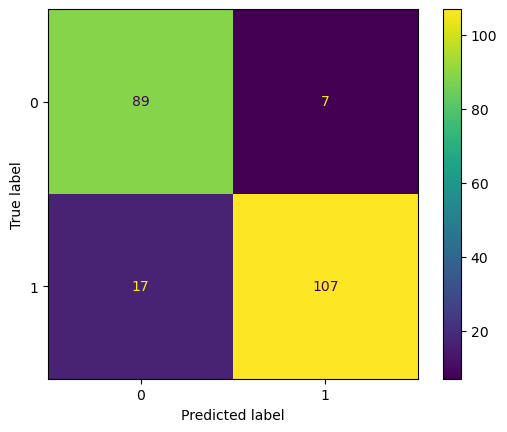

In [299]:
y_pred = rfc.predict(Xt_test)
c_report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

print(c_report)

In [310]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 30.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

### **Prediction**
 - sample should be like dataframe with column names.

In [329]:

def prediction(sample):
    ids  = sample['PassengerId'].values
    sample.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace= True)
    sample[['Sex']] = enc.transform(sample[['Sex']])
    test_sample = sample.iloc[:, :].values
    test_sample = ss.transform(test_sample)
    pred = rfc.predict(test_sample)
    #print(ids)
    #print(pred)
    result = pd.DataFrame({'PassengerID':ids, 'Survived':pred})
    result.to_csv("Survival_Prediction.csv", index = False)

In [330]:
df_test = pd.DataFrame([[2,	1, "Cumings, Mrs. John Bradley, (Florence Briggs)",	'female', 38.0,	1,	0,	'PC 17599',	71.2833, 'C85',	'C'],
                       [3, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0, 'STON/O2. 3101282', 7.9250, 'c23', 'S'],
                       [5, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0, '373450',	8.0500, 'B45', 'S']],
                        columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked' ])
prediction(df_test)
print("Done")

Done
